# 1) Importing modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing the dataset

In [3]:
df = pd.read_csv('kc_house_data.csv')
# show first 5 rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# basic dataset statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Method for calculating adjusted R^2

In [6]:
def adjustedR2(r2,n,k):
  return r2-(k-1)/(n-k)(1-r2)

# 2) Create Simple Linear Regression

Simple linear regression has one independent variable (IV) and one dependent variable (price). I choose the most important IV from the columns: living area (sqft). 

In [8]:
#%%capture
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

# Import model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Create training set
X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)

# Create test set
X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)

# fit the model with x & y vars
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Prediction & Evaluation

In [20]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),'.3f'))

# <2 ways for getting r2 scores>
# 1) lr.score only require (input_X, known_y) variables -> autocalculates pred_y and find r2 using the fitted model
# r2_train = float(format(lr.score(X_train, y_train),'.3f'))
# r2_test = float(format(lr.score(X_test, y_test),'.3f'))

# 2) r2_score function only require (known_y, prediected_y)
from sklearn.metrics import r2_score 
r2_train = format(r2_score(y_train,y_train_pred),'.3f')
r2_test = format(r2_score(y_test,y_test_pred), '.3f')

cv = float(format(cross_val_score(lr,df[["sqft_living"]],df[["price"]],cv=5).mean(),'.3f'))

print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
# print('Intercept: {}'.format(lr.intercept_))
# print('Coefficient: {}'.format(lr.coef_))
print("Equation: {} + {}x".format(lr.intercept_, lr.coef_))
print("Simple Linear Regression -> RMSE: {}, r2_train: {}, r2_test: {}, CV_score: {}".format(rmse,r2_train,r2_test,cv))


Average Price for Test Data: 539744.130
Equation: -47235.81130290113 + [282.2468152]x
Simple Linear Regression -> RMSE: 254289.149, r2_train: 0.492, r2_test: 0.496, CV_score: 0.491


## Visualizing the result

In [21]:
sns.set(style="white", font_scale=1)

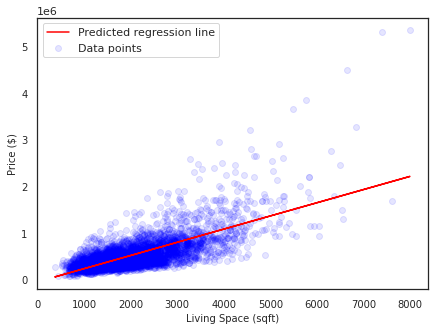

In [30]:
plt.figure(figsize=(7,5))
plt.scatter(X_test, y_test, color = 'blue', label="Data points", alpha=.1)
plt.plot(X_test,y_test_pred, color="red", label="Predicted regression line")
plt.xlabel("Living Space (sqft)", fontsize=10)
plt.ylabel("Price ($)", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()

# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)

# 3) Analyzing the dataset with visualization

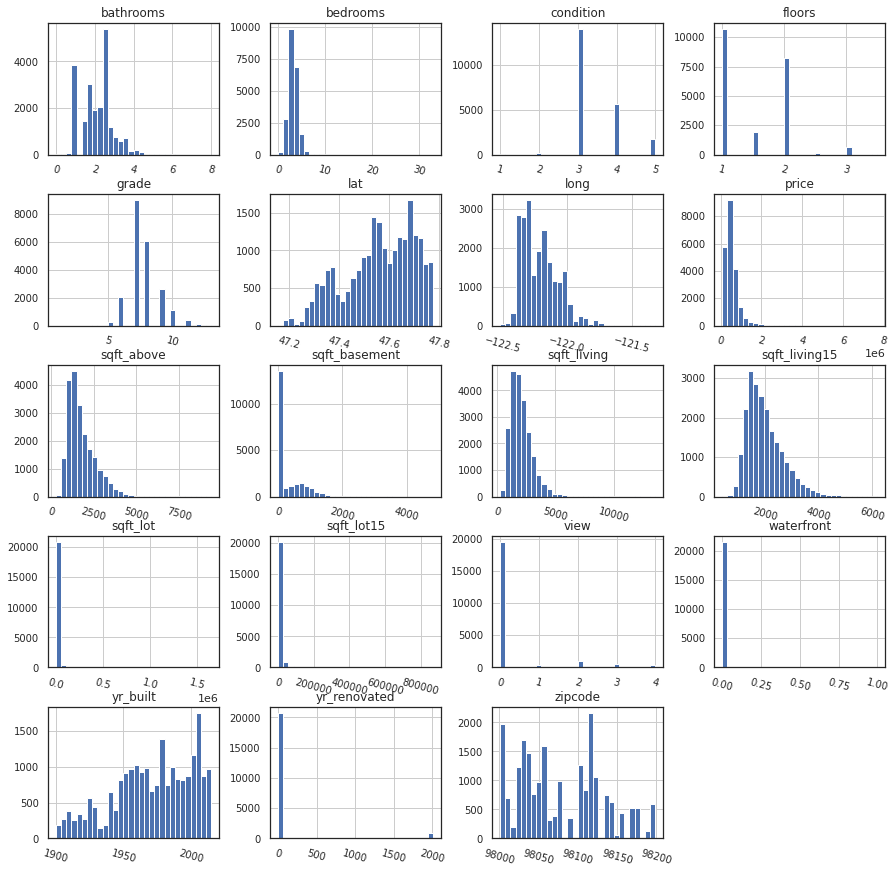

In [39]:
# histograms of dataset
df_hist = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
    'lat', 'long', 'sqft_living15', 'sqft_lot15']]
h = df_hist.hist(bins=30,figsize=(15,15),xlabelsize='10',ylabelsize='10',xrot=-15)
#sns.despine(left=True, bottom=True)
#[x.title.set_size(12) for x in h.ravel()];
#[x.yaxis.tick_left() for x in h.ravel()];